In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

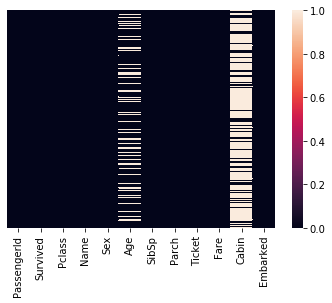

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


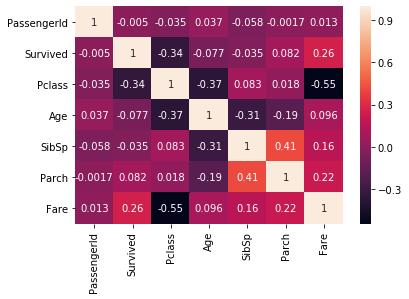

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df=df.drop(['Name','Cabin','Ticket'],axis=1)

In [11]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.25,S


In [12]:
df.shape

(891, 9)

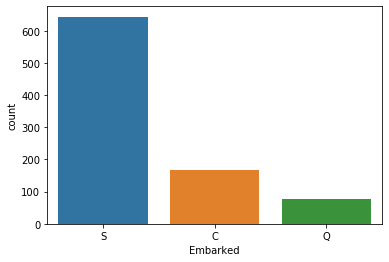

In [13]:
sns.countplot(df['Embarked'],data=df)

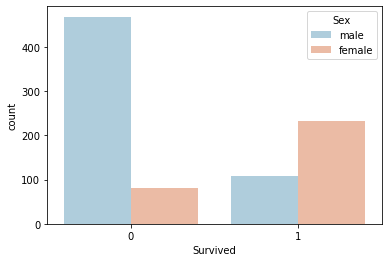

In [14]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

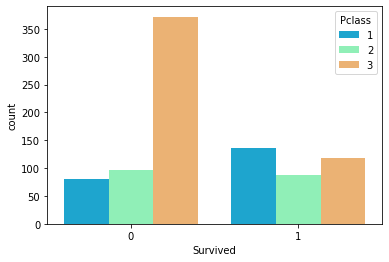

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

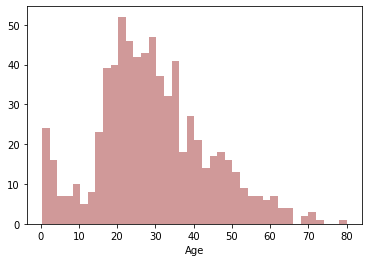

In [16]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

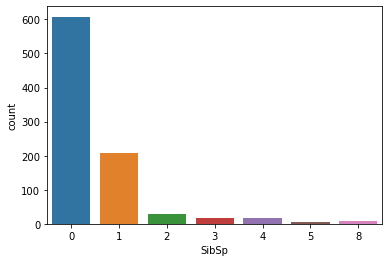

In [17]:
sns.countplot(x='SibSp',data=df)

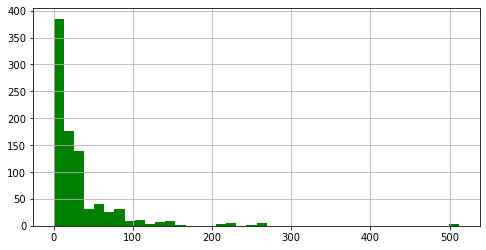

In [18]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

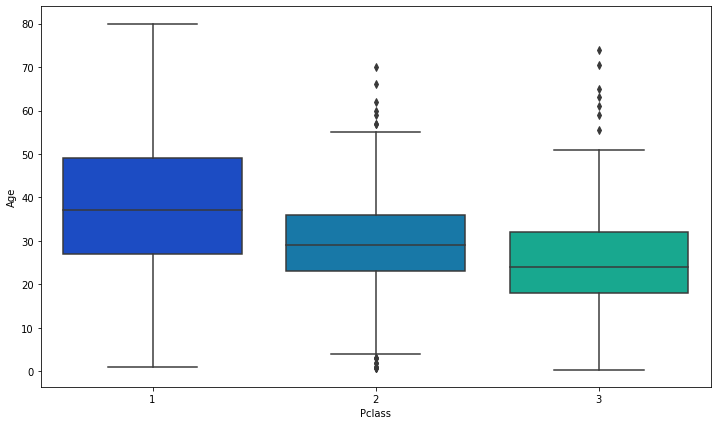

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

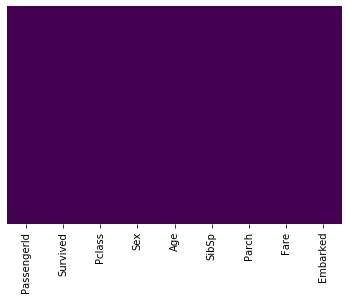

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df.dropna(inplace=True)

In [24]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)


In [25]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [26]:
df=pd.concat([df,sex,embarked],axis=1)

In [27]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.25,S,1,0,1


In [28]:
df=df.drop(['Sex','Embarked'],axis=1)

In [29]:
df.head(3)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [31]:
x=df.drop(['Survived'],axis=1)
x.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.25,1,0,1


In [32]:
y=df.iloc[:,1]
y.head(5)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
model=[SVC(),GaussianNB(),LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),XGBClassifier(),
       GradientBoostingClassifier(),DecisionTreeClassifier()]

In [37]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    m.score(x_train,y_train)
    print("accurancy score",m,"is")
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print('\n')
    

accurancy score SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is
0.8352059925093633
[[153  11]
 [ 33  70]]


accurancy score GaussianNB(priors=None, var_smoothing=1e-09) is
0.7528089887640449
[[138  26]
 [ 40  63]]


accurancy score LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is
0.7902621722846442
[[141  23]
 [ 33  70]]


accurancy score RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def maxf1 (clf,x,y):
    maxf=0
    rs=0
    for r_state in range(30,80):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=r_state)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        tmp=f1_score(y_test,pred)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random_state",rs,"it is",maxf)        
        

In [39]:
lr=LogisticRegression()
maxf1(lr,x,y)

maximum f1_score is at random_state 77 it is 0.7980295566502463


In [40]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lr,x,y,cv=15,scoring="f1").mean())

Mean f1 score for logistic classifier:  0.7264161337616487


In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.4,0.5,0.6,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 0.6, 'kernel': 'rbf'}

In [88]:
svc=SVC(kernel="rbf",C=0.6)
maxf1(svc,x,y)

maximum f1_score is at random_state 71 it is 0.7868852459016393


In [89]:
print("Mean f1 score for svc: ",cross_val_score(svc,x,y,cv=5,scoring="f1").mean())

Mean f1 score for svc:  0.7474529236159804


In [90]:
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,20,30,40,50,80]}
rf=RandomForestClassifier()
gd=GridSearchCV(rf,parameters,cv=5,scoring="f1")
gd.fit(x,y)
gd.best_params_

{'n_estimators': 80}

In [91]:
rf=RandomForestClassifier(n_estimators=80)
maxf1(rf,x,y)

maximum f1_score is at random_state 74 it is 0.8080808080808082


In [92]:
print("Mean f1 score for random_forest_classifier: ",cross_val_score(rf,x,y,cv=5,scoring="f1").mean())

Mean f1 score for random_forest_classifier:  0.7041577751218686


In [47]:
clf=XGBClassifier()
maxf1(clf,x,y)

maximum f1_score is at random_state 37 it is 0.8058252427184466


In [58]:
print("Mean f1 score for xgb_classifier: ",cross_val_score(clf,x,y,cv=5,scoring="f1").mean())

Mean f1 score for xgb_classifier:  0.5954942657624798


In [49]:
adb=AdaBoostClassifier()
maxf1(adb,x,y)

maximum f1_score is at random_state 77 it is 0.7813953488372093


In [59]:
print("Mean f1 score for adaboost_classifier: ",cross_val_score(adb,x,y,cv=5,scoring="f1").mean())

Mean f1 score for adaboost_classifier:  0.46990759033841056


In [51]:
gb=GradientBoostingClassifier()
maxf1(gb,x,y)

maximum f1_score is at random_state 68 it is 0.8140703517587939


In [60]:
print("Mean f1 score for gradientboosting: ",cross_val_score(gb,x,y,cv=5,scoring="f1").mean())

Mean f1 score for gradientboosting:  0.5978631914175436


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 37,test_size=0.20)
rf_clf=RandomForestClassifier(n_estimators=80)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[95  8]
 [19 56]]
f1 score is :  0.8057553956834532
classification report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88       103
           1       0.88      0.75      0.81        75

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178

AUC ROC Score:  0.8344983818770226
